In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

In [39]:
np.ones((99,49)).sum(axis=0)

array([99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99.,
       99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99.,
       99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99., 99.,
       99., 99., 99., 99., 99., 99., 99., 99., 99., 99.])

Text(0.5, 1.0, 'Distribution of p-values for Granger causality test')

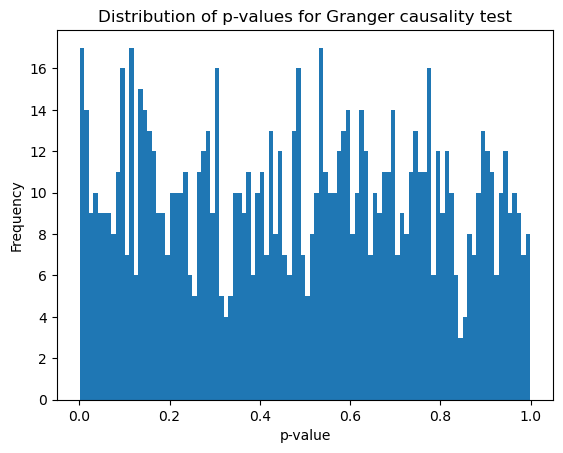

In [52]:

def dynamic_system():
    # with variables X, Y, Z. Both X and Z cause Y quadratically
    n = 41 # number of observations
    X = np.random.normal(size=n)  # X is a random variable
    Z = X + np.random.normal(size=n)  # Z is correlated with X
    # create Y depending of Z and with autocorrelation
    Y = 0.5 * Z + np.random.normal(size=n, scale=1)  # Y is a function of Z and X
    # introduce autocorrelation in Y
    Y = np.cumsum(Y)  # cumulative sum to introduce autocorrelation
    # shift Y by 1 to introduce lagged effect
    Y = np.roll(Y, 1)

    return pd.DataFrame({'X': X, 'X2':X**2, 'Y': Y, 'Z': Z}).iloc[1:]

pvalues = []
for i in range(1000):
    # Generate 100 random observations for 3 variables
    # np.random.seed(42)
    data = dynamic_system()

    model = VAR(data[['X', 'Y', 'Z']])
    results = model.fit(maxlags=1)

    # Test if X Granger-causes Y, conditional on Z
    causality = results.test_causality(caused='Y', causing=['X'], kind='f')

    # Store the result
    pvalues.append(causality.pvalue)

# histogram

plt.hist([r for r in pvalues], bins=100)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Granger causality test')


In [59]:
results.coefs[0][1][0]

np.float64(-0.11098652649236596)

In [54]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 04, Jul, 2025
Time:                     12:26:29
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.549761
Nobs:                     39.0000    HQIC:                  0.221549
Log likelihood:          -154.755    FPE:                    1.04088
AIC:                    0.0378961    Det(Omega_mle):        0.776586
--------------------------------------------------------------------
Results for equation X
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.139583         0.363049            0.384           0.701
L1.X          0.198137         0.215875            0.918           0.359
L1.Y         -0.043412         0.084816           -0.512           0.609
L1.Z         -0.175616 

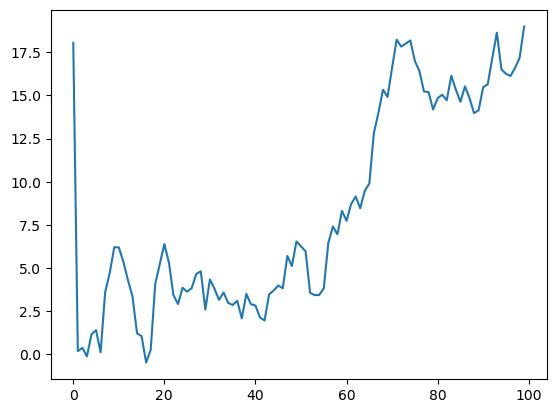

In [21]:
n = 100 # number of observations
X = np.random.normal(size=n)  # X is a random variable
Z = X + np.random.normal(size=n)  # Z is correlated with X
# create Y depending of Z and with autocorrelation
Y = 0.5 * Z + np.random.normal(size=n)  # Y is a function of Z and X
# introduce autocorrelation in Y
Y = np.cumsum(Y)  # cumulative sum to introduce autocorrelation
# shift Y by 1 to introduce lagged effect
Y = np.roll(Y, 1)
plt.plot(Y)

In [233]:
causality.summary()

Test statistic,Critical value,p-value,df
1.139,3.890,0.287,"(1, 192)"


Text(0.5, 1.0, 'Distribution of p-values for Granger causality test')

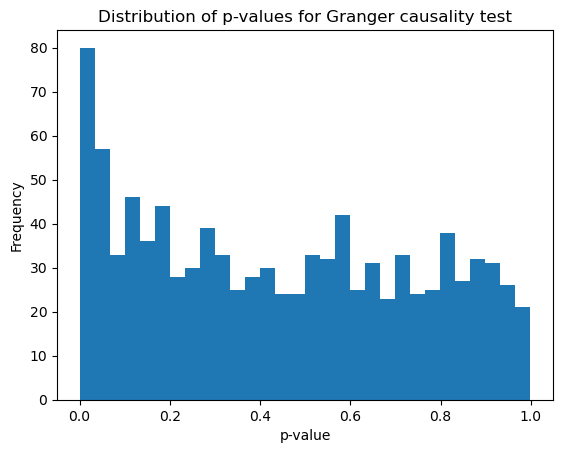

In [392]:
p_values = []
for i in range(1000):
    X = np.random.random(size=100)
    Y = X * (1 - X) /0.25 + np.random.normal(size=100, scale = 0.1)
    Y = np.roll(Y, 1)  # shift Y by 1 to introduce lagged effect
    data = pd.DataFrame({'X': X, 'Y': Y})
    model = VAR(data[['X','Y']])
    results = model.fit(maxlags=1)

    causality = results.test_causality(caused='Y', causing=['X'], kind='f')
    causality.summary()
    p_values.append(causality.pvalue)

plt.hist(p_values, bins=30)
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.title('Distribution of p-values for Granger causality test')

(array([-0.00054905]), np.float64(0.6659305247770799))

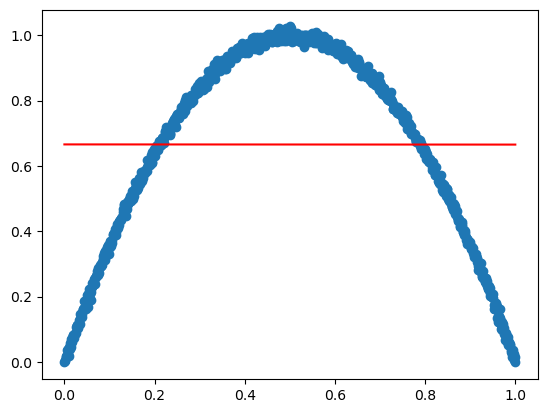

In [234]:
X = np.linspace(0, 1, 1000)
Y = X * (1 - X) /0.25 + np.random.normal(size=1000, scale = 0.01)
plt.plot(X, Y, 'o')

# do a fit model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
Y_pred = model.predict(X.reshape(-1, 1))
plt.plot(X, Y_pred, color='red')

model.coef_, model.intercept_

In [46]:
causality.pvalue

np.float64(0.6771443920982481)

In [45]:
causality.summary()

Test statistic,Critical value,p-value,df
0.3904,3.029,0.677,"(2, 273)"
